In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

## **Generate the dataset**

In [2]:
n_samples = 1000
n_features = 20
n_informative = 15
n_redundant = 5
n_classes = 5

X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=n_informative, n_redundant=n_redundant,
                           n_classes=n_classes, random_state=42)

## **Visualize the Dataset**

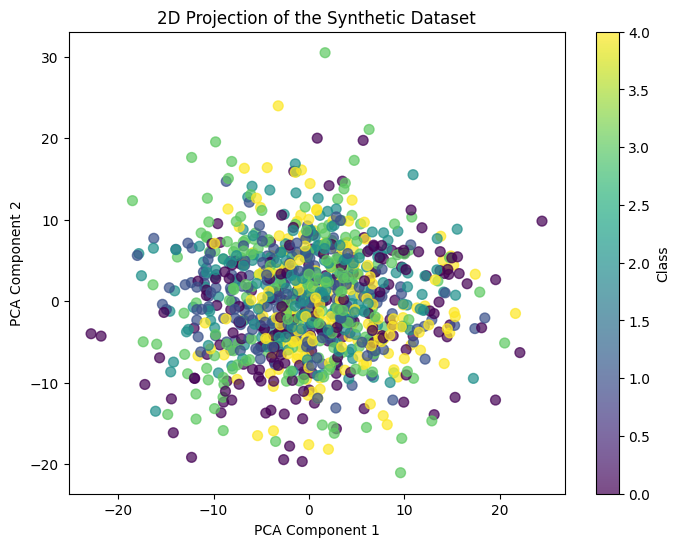

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('2D Projection of the Synthetic Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class')
plt.show()

## **Convert Lables to One-Hot Encoding for (Neural Network)**

In [4]:
from keras.utils import to_categorical

y_one_hot = to_categorical(y, num_classes=n_classes)


## **Split the Dataset**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


## **Extend the NeuralNetwork Class for Multi-Class Classifiaction**
## **Initialize Weights and Biases**

In [6]:
def initialize_weights(self):
    self.weights = [
        np.random.randn(self.input_size, self.hidden_size1),
        np.random.randn(self.hidden_size1, self.hidden_size2),
        np.random.randn(self.hidden_size2, self.hidden_size3),
        np.random.randn(self.hidden_size3, 5)
    ]
    self.biases = [
        np.zeros((1, self.hidden_size1)),
        np.zeros((1, self.hidden_size2)),
        np.zeros((1, self.hidden_size3)),
        np.zeros((1, 5))
    ]

## **Forward Pass**

In [7]:
def softmax(self, z):
    exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def forward(self, X):
    self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
    self.a1 = self.relu(self.z1)
    self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
    self.a2 = self.relu(self.z2)
    self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
    self.a3 = self.relu(self.z3)
    self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
    self.output = self.softmax(self.z4)
    return self.output

## **Loss Function**

In [8]:
def compute_loss(self, y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


## **Backpropagation**

In [9]:
def backward(self, X, y_true, learning_rate=0.01):
    m = X.shape[0]

    dZ4 = self.output - y_true
    dW4 = np.dot(self.a3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m

    dA3 = np.dot(dZ4, self.weights[3].T)
    dZ3 = dA3 * self.relu_derivative(self.z3)
    dW3 = np.dot(self.a2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, self.weights[2].T)
    dZ2 = dA2 * self.relu_derivative(self.z2)
    dW2 = np.dot(self.a1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, self.weights[1].T)
    dZ1 = dA1 * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    self.weights[3] -= learning_rate * dW4
    self.biases[3] -= learning_rate * db4
    self.weights[2] -= learning_rate * dW3
    self.biases[2] -= learning_rate * db3
    self.weights[1] -= learning_rate * dW2
    self.biases[1] -= learning_rate * db2
    self.weights[0] -= learning_rate * dW1
    self.biases[0] -= learning_rate * db1

## **Define the NeuralNetwork Class**

In [10]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size=5):

        self.weights = [
            np.random.randn(input_size, hidden_size1),
            np.random.randn(hidden_size1, hidden_size2),
            np.random.randn(hidden_size2, hidden_size3),
            np.random.randn(hidden_size3, output_size)
        ]
        self.biases = [
            np.zeros((1, hidden_size1)),
            np.zeros((1, hidden_size2)),
            np.zeros((1, hidden_size3)),
            np.zeros((1, output_size))
        ]

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights[0]) + self.biases[0]
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights[1]) + self.biases[1]
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.weights[2]) + self.biases[2]
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.weights[3]) + self.biases[3]
        self.output = self.softmax(self.z4)
        return self.output

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss

    def backward(self, X, y_true, learning_rate=0.01):
        m = X.shape[0]

        dZ4 = self.output - y_true
        dW4 = np.dot(self.a3.T, dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        dA3 = np.dot(dZ4, self.weights[3].T)
        dZ3 = dA3 * self.relu_derivative(self.z3)
        dW3 = np.dot(self.a2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = np.dot(dZ3, self.weights[2].T)
        dZ2 = dA2 * self.relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.weights[1].T)
        dZ1 = dA1 * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.weights[3] -= learning_rate * dW4
        self.biases[3] -= learning_rate * db4
        self.weights[2] -= learning_rate * dW3
        self.biases[2] -= learning_rate * db3
        self.weights[1] -= learning_rate * dW2
        self.biases[1] -= learning_rate * db2
        self.weights[0] -= learning_rate * dW1
        self.biases[0] -= learning_rate * db1



## **Train the NeuralNetwork**

In [11]:
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size1=64, hidden_size2=64, hidden_size3=64)
epochs = 100
learning_rate = 0.01

for epoch in range(epochs):

    output = nn.forward(X_train)

    loss = nn.compute_loss(y_train, output)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    nn.backward(X_train, y_train, learning_rate)


Epoch 1/100, Loss: 14.813462132741725
Epoch 2/100, Loss: 13.891457844079078
Epoch 3/100, Loss: 13.801818837547184
Epoch 4/100, Loss: 13.559631545773971
Epoch 5/100, Loss: 11.942213444553156
Epoch 6/100, Loss: 11.227881591131245
Epoch 7/100, Loss: 10.155112849446912
Epoch 8/100, Loss: 9.124548961589863
Epoch 9/100, Loss: 8.554525367697318
Epoch 10/100, Loss: 8.24000356040393
Epoch 11/100, Loss: 7.911946790643884
Epoch 12/100, Loss: 7.448855735096583
Epoch 13/100, Loss: 7.3095363463822425
Epoch 14/100, Loss: 6.758261443958754
Epoch 15/100, Loss: 6.778996479289192
Epoch 16/100, Loss: 6.261961771031051
Epoch 17/100, Loss: 6.421540061842414
Epoch 18/100, Loss: 5.968229715117848
Epoch 19/100, Loss: 6.189540812707635
Epoch 20/100, Loss: 5.622822156056111
Epoch 21/100, Loss: 5.709283536413461
Epoch 22/100, Loss: 5.264648000205937
Epoch 23/100, Loss: 5.629648648968172
Epoch 24/100, Loss: 4.869936151625669
Epoch 25/100, Loss: 5.01125512273124
Epoch 26/100, Loss: 4.508605050291757
Epoch 27/100, L

## **Test the Neural Network**

In [12]:
y_pred = nn.forward(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 43.50%


## **Evaluation Metrics**


## **Import Metrics**

In [13]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_true_classes, y_pred_classes))


Accuracy: 43.50%
              precision    recall  f1-score   support

           0       0.35      0.30      0.32        30
           1       0.62      0.46      0.52        46
           2       0.43      0.34      0.38        44
           3       0.30      0.45      0.36        38
           4       0.51      0.60      0.55        42

    accuracy                           0.43       200
   macro avg       0.44      0.43      0.43       200
weighted avg       0.45      0.43      0.44       200



## **Confusion Matrix**

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

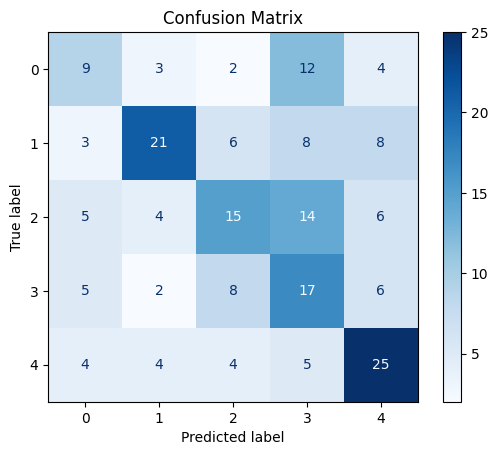

In [15]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## **ROC Curve**

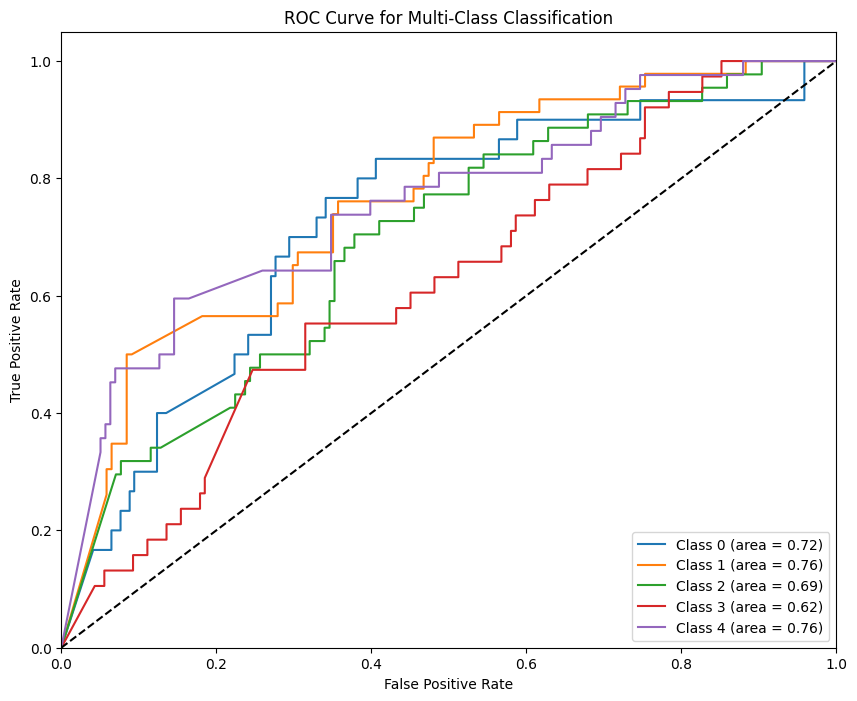

In [16]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


## **Full Evaluation**

Test Accuracy: 43.50%


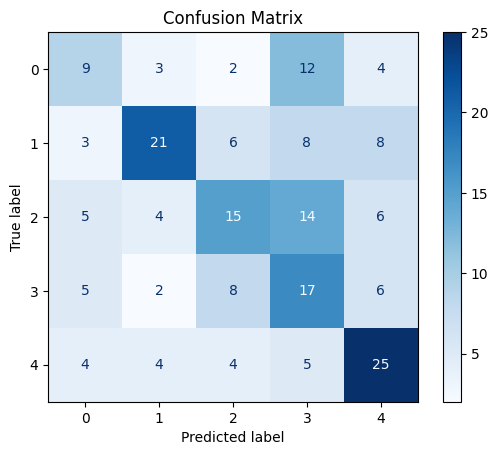

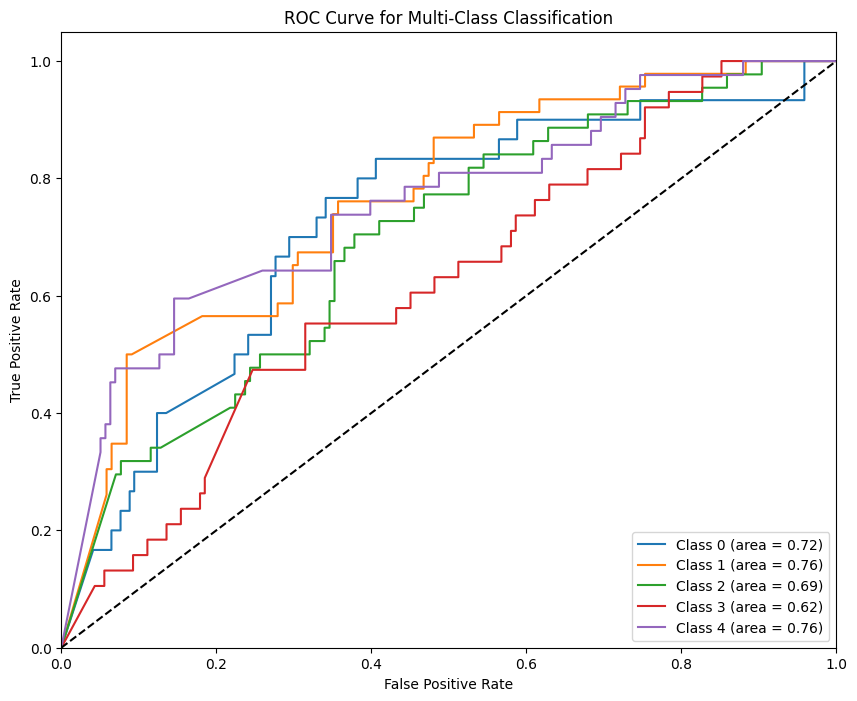

In [17]:
y_pred = nn.forward(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

fpr = {}
tpr = {}
roc_auc = {}

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()